In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf


In [3]:
from tensorflow import keras


In [4]:
keras.__version__

'2.4.0'

In [5]:
tf.__version__

'2.3.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full , y_train_full) , (X_test , y_test) = fashion_mnist.load_data()

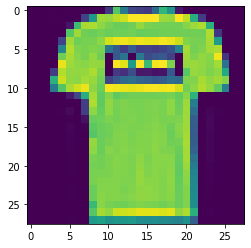

In [8]:
plt.imshow(X_train_full[1])

In [9]:
y_train_full[1]

0

In [10]:
class_names=["T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot"]

In [11]:
class_names[y_train_full[1]]

'T-shirt/top'

In [12]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

#  Data Normalisation


In [13]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

# Split the data into train/validation/test datasets
Training data - used to train the model
Validation data - used for tuning the hyperparameters and evaluate the model
Test data - used to test the model after the model has gone through initial vetting by the validation set

In [14]:
X_valid , X_train =X_train_n[:5000] , X_train_n[5000:]
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test_n

In [15]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300 , activation="relu"))
model.add(keras.layers.Dense(100 , activation="relu"))
model.add(keras.layers.Dense(10 , activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


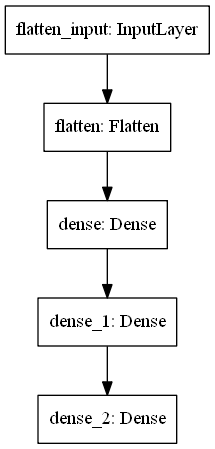

In [19]:
import pydot
keras.utils.plot_model(model)

In [20]:
weights , biases = model.layers[1].get_weights()

In [21]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

# Model Training

In [25]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="sgd" , metrics=["accuracy"])

In [26]:
model_history=model.fit(X_train , y_train , epochs=30 , validation_data=(X_valid , y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4844 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.5306 - val_accuracy: 0.7992
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3916 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3752 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8675 - val_loss: 0.3708 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8715 - val_loss: 0.3629 - val_accuracy:

In [28]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [29]:
model_history.history

{'loss': [0.7236779928207397,
  0.48435667157173157,
  0.4392773509025574,
  0.4125038683414459,
  0.39399659633636475,
  0.3753809332847595,
  0.36330899596214294,
  0.3518659174442291,
  0.34169813990592957,
  0.332302987575531,
  0.3243608772754669,
  0.31503498554229736,
  0.30824723839759827,
  0.3024706542491913,
  0.29497259855270386,
  0.2893359065055847,
  0.28416046500205994,
  0.2779114246368408,
  0.27306440472602844,
  0.26765772700309753,
  0.26248979568481445,
  0.25784969329833984,
  0.25363919138908386,
  0.24861451983451843,
  0.24450451135635376,
  0.2407207190990448,
  0.23657581210136414,
  0.23294444382190704,
  0.2285480946302414,
  0.22550171613693237],
 'accuracy': [0.7644181847572327,
  0.83160001039505,
  0.8455091118812561,
  0.8563636541366577,
  0.8620181679725647,
  0.8675090670585632,
  0.8715272545814514,
  0.8748727440834045,
  0.8787999749183655,
  0.8824545741081238,
  0.8832908868789673,
  0.8863999843597412,
  0.889018177986145,
  0.891272723674774

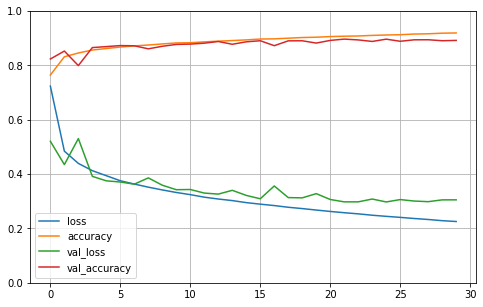

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8822


[0.33928123116493225, 0.8822000026702881]

In [32]:
X_new = X_test[:3]

In [33]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


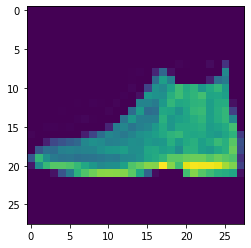

In [36]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


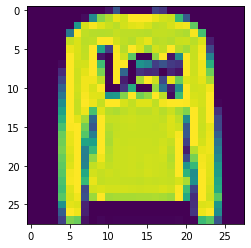

In [37]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


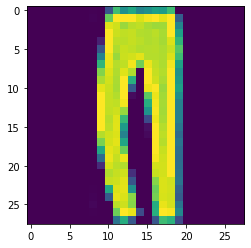

In [38]:
print(plt.imshow(X_test[2]))